In [12]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [2]:
#loading dataset
data=pd.read_csv('/content/manufacturing_process_data.csv')

In [3]:
#knowing about the data
data.head()

,MachineID,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FaultCode,LastMaintenance,FailureCount
0,1.0,49.963210,36.908120,3.241285,75.678901,130.861264,1.0,B,01-01-2023,1.0
1,2.0,96.057145,41.867256,0.861932,56.268024,16.006514,1.0,C,01-01-2023,0.0
2,3.0,78.559515,20.018716,4.361973,66.245514,48.465962,0.0,D,01-01-2023,0.0
3,4.0,67.892679,34.994964,3.065581,51.802415,154.735869,1.0,E,01-01-2023,0.0
4,5.0,32.481491,32.869839,0.786019,61.501729,105.737171,0.0,E,01-01-2023,1.0


In [4]:
data.describe()

,MachineID,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FailureCount
count,2955.000000,2964.000000,2961.000000,2952.000000,2960.000000,2954.000000,2956.000000,2943.000000
mean,1499.258206,60.004050,29.746694,2.436838,55.092514,100.016932,0.507104,1.007136
std,867.221931,23.335431,11.486868,1.428544,14.411794,58.111719,0.500034,1.013648
min,1.000000,20.000931,10.001229,0.001205,30.002641,0.240723,0.000000,0.000000
25%,749.500000,39.724259,19.818178,1.206617,42.708433,49.075850,0.000000,0.000000
50%,1496.000000,60.428300,29.527107,2.413469,54.872759,98.709911,1.000000,1.000000
75%,2251.500000,80.373411,39.515399,3.646553,67.747492,152.145351,1.000000,2.000000
max,3000.000000,99.977414,49.982308,4.997303,79.983660,199.961029,1.000000,6.000000


In [6]:
data.shape

(3000, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MachineID            2955 non-null   float64
 1   Temperature          2964 non-null   float64
 2   Pressure             2961 non-null   float64
 3   Vibration            2952 non-null   float64
 4   Humidity             2960 non-null   float64
 5   RunTime              2954 non-null   float64
 6   MaintenanceRequired  2956 non-null   float64
 7   FaultCode            2957 non-null   object 
 8   LastMaintenance      2951 non-null   object 
 9   FailureCount         2943 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


In [8]:
# AS id,last maintanence are not required for model and faultcode too, lets drop
data_processed = data.drop(columns=['MachineID', 'FaultCode', 'LastMaintenance'], errors='ignore')


In [9]:
data_processed.shape

(3000, 7)

In [10]:
#dropping duplicates
data_processed.drop_duplicates(inplace=True)

In [11]:
data_processed.shape

(3000, 7)

In [15]:
data_processed.isnull().sum()

,0
Temperature,36
Pressure,39
Vibration,48
Humidity,40
RunTime,46
MaintenanceRequired,44
FailureCount,57


In [19]:
#handling missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_processed)
data_imputed = pd.DataFrame(data_imputed, columns=data_processed.columns)

In [21]:
data_imputed.isnull().sum()

,0
Temperature,0
Pressure,0
Vibration,0
Humidity,0
RunTime,0
MaintenanceRequired,0
FailureCount,0


In [28]:
data_imputed.head()

,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FailureCount
0,49.963210,36.908120,3.241285,75.678901,130.861264,1.0,1.0
1,96.057145,41.867256,0.861932,56.268024,16.006514,1.0,0.0
2,78.559515,20.018716,4.361973,66.245514,48.465962,0.0,0.0
3,67.892679,34.994964,3.065581,51.802415,154.735869,1.0,0.0
4,32.481491,32.869839,0.786019,61.501729,105.737171,0.0,1.0


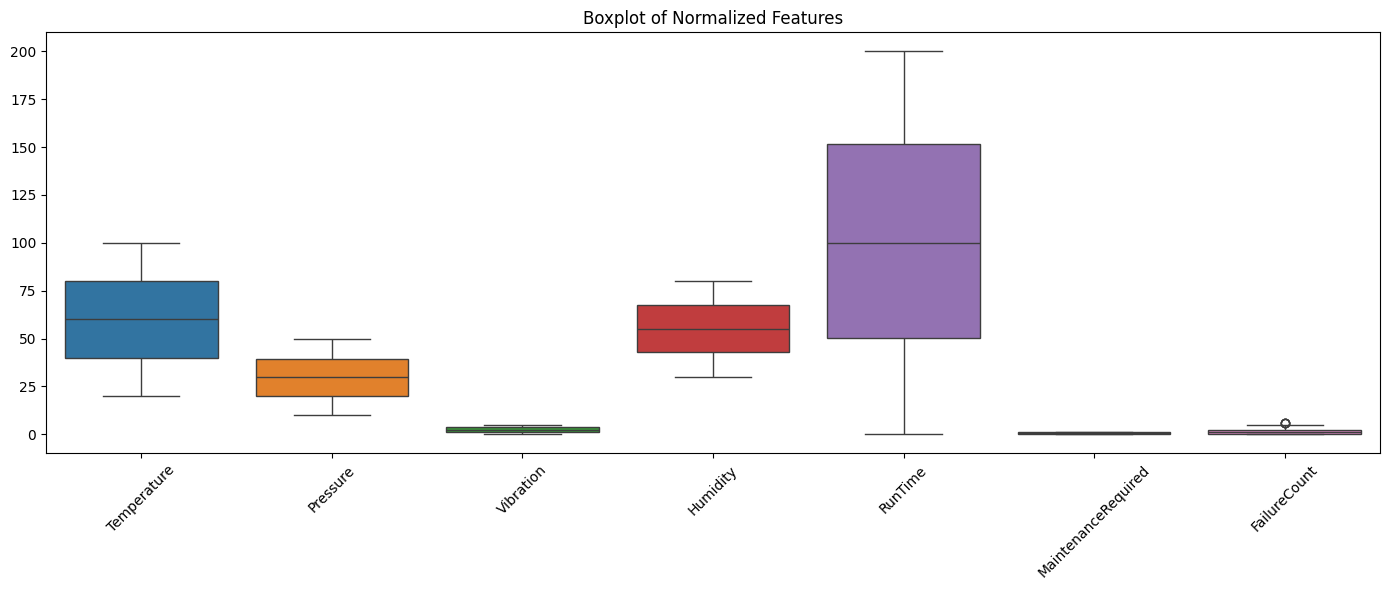

In [42]:
# Boxplots for all numeric features to inspect outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=pd.DataFrame(data_imputed, columns=data_imputed.columns))
plt.xticks(rotation=45)
plt.title("Boxplot of Normalized Features")
plt.tight_layout()
plt.show()


In [27]:
#normalizing features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
data_scaled = pd.DataFrame(data_scaled, columns=data_imputed.columns)

In [29]:
data_scaled.head()

,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FailureCount
0,-0.432961,0.627643,0.567780,1.438302,0.534984,0.993202,-0.007109
1,1.554610,1.062272,-1.111571,0.082129,-1.457130,0.993202,-1.003322
2,0.800112,-0.852581,1.358763,0.779223,-0.894133,-1.021832,-1.003322
3,0.340158,0.459970,0.443768,-0.229868,0.949080,0.993202,-1.003322
4,-1.186773,0.273719,-1.165150,0.447791,0.099215,-1.021832,-0.007109


In [30]:
#lets train on isolation forest model
from sklearn.ensemble import IsolationForest
model_if=IsolationForest(contamination=0.05, random_state=42)
model_if.fit(data_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [32]:
#predict anomalies
preds = model_if.predict(data_scaled)
anomaly_scores = model_if.decision_function(data_scaled)

In [33]:
data_scaled["anomaly_pred"]=preds
data_scaled["anomaly_scores"]=anomaly_scores

In [34]:
data_scaled.head()

,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FailureCount,anomaly_pred,anomaly_scores
0,-0.432961,0.627643,0.567780,1.438302,0.534984,0.993202,-0.007109,1,0.087754
1,1.554610,1.062272,-1.111571,0.082129,-1.457130,0.993202,-1.003322,1,0.012880
2,0.800112,-0.852581,1.358763,0.779223,-0.894133,-1.021832,-1.003322,1,0.065323
3,0.340158,0.459970,0.443768,-0.229868,0.949080,0.993202,-1.003322,1,0.087240
4,-1.186773,0.273719,-1.165150,0.447791,0.099215,-1.021832,-0.007109,1,0.096603


In [35]:
#emodels output

anomaly_count = (preds == -1).sum()
normal_count = (preds == 1).sum()
total = len(preds)
print("Evaluation Summary:")
print(f"Total data points: {total}")
print(f"Normal points: {normal_count}")
print(f"Anomalies detected: {anomaly_count}")
print(f"Anomaly Percentage: {round((anomaly_count / total) * 100, 2)}%")

Evaluation Summary:
Total data points: 3000
Normal points: 2850
Anomalies detected: 150
Anomaly Percentage: 5.0%


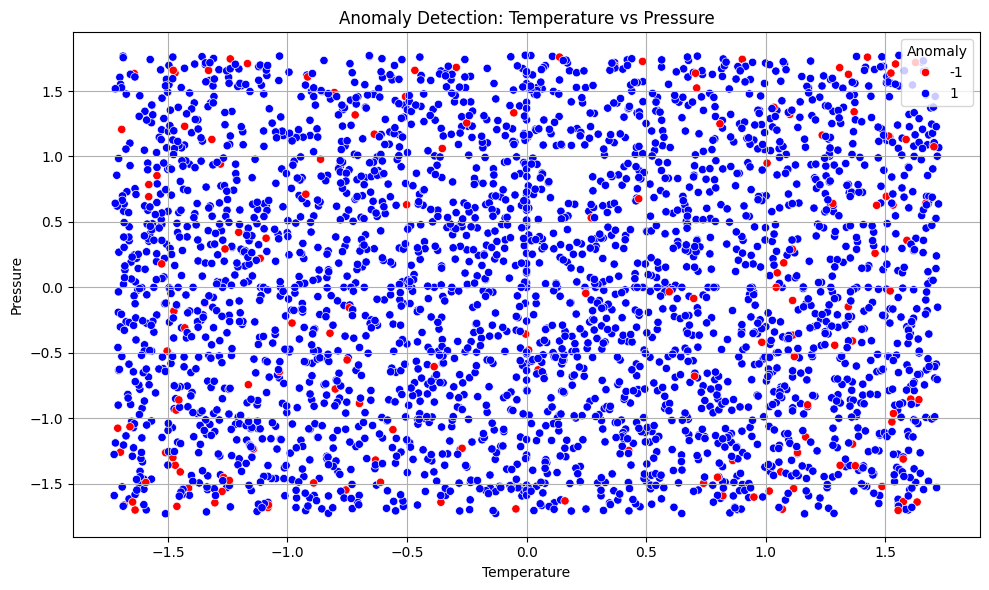

In [39]:
#scatter plot to show anamolies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_scaled, x='Temperature', y='Pressure', hue='anomaly_pred', palette={1: 'blue', -1: 'red'})
plt.title("Anomaly Detection: Temperature vs Pressure")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.grid(True)
plt.legend(title="Anomaly")
plt.tight_layout()
plt.show()